# Parte 2

## Task 02

In [1]:
import random

random.seed(1)

# Generador 1 - Lineal Congruencial
def generador_1(semilla=1, a=1664525, c=1013904223, m=2**32):
    x = semilla
    while True:
        x = (a * x + c) % m
        yield x / m  # Normalizamos el valor para que esté en el rango [0, 1]

# Generador 2 - Fibonacci Modificado
def generador_2(semilla1=1, semilla2=1, m=2**32):
    x1, x2 = semilla1, semilla2
    while True:
        x = (x1 + x2) % m
        x1, x2 = x2, x  # Avanzamos las semillas
        yield x / m  # Normalizamos el valor para que esté en el rango [0, 1]

# Generador 3 - Uniforme (Baseline)
def generador_3():
    return random.uniform(0, 1)



In [13]:
# Función para generar histogramas y calcular porcentajes
def generar_histograma(valores, titulo, mostrar_grafico=True):
    histograma = [0] * 10
    total = len(valores)
    
    # Contamos los valores en cada intervalo
    for valor in valores:
        indice = int(valor * 10)
        if indice == 10:
            indice = 9
        histograma[indice] += 1
    
    if mostrar_grafico:
        print(f"\n{titulo}")
        for i in range(10):
            rango = f"[{i/10:.1f}, {(i+1)/10:.1f})"
            cantidad = histograma[i]
            porcentaje = (cantidad / total) * 100
            print(f"{rango}: {cantidad} ({porcentaje:.2f}%) {'*' * cantidad}")
    
    return histograma, total

# Función principal para realizar los experimentos
def realizar_experimentos():
    repeticiones = [100, 5000, 100000]
    generadores = [generador_1, generador_2, generador_3]
    nombres_generadores = ["Generador 1", "Generador 2", "Generador 3"]

    resumen_resultados = []

    for rep in repeticiones:
        print(f"\nComparación con {rep} repeticiones:")
        for i, generador_func in enumerate(generadores):
            # Inicializamos el generador para los generadores 1 y 2
            if i < 2:
                generador = generador_func()
                valores = [next(generador) for _ in range(rep)]
            else:
                # Para el generador 3, llamamos la función directamente
                valores = [generador_func() for _ in range(rep)]
            
            # Generamos y mostramos el histograma con asteriscos
            histograma, total = generar_histograma(valores, nombres_generadores[i])
            resumen_resultados.append((nombres_generadores[i], rep, histograma, total))

    # Mostrar el resumen final sin los asteriscos
    print("\nResumen Final (sin representación gráfica):")
    for nombre, rep, histograma, total in resumen_resultados:
        print(f"\nGenerador: {nombre} | Repeticiones: {rep}")
        for i in range(10):
            rango = f"[{i/10:.1f}, {(i+1)/10:.1f})"
            cantidad = histograma[i]
            porcentaje = (cantidad / total) * 100
            print(f"{rango}: {cantidad} ({porcentaje:.2f}%)")

# Ejecutamos los experimentos
realizar_experimentos()


Comparación con 100 repeticiones:

Generador 1
[0.0, 0.1): 9 (9.00%) *********
[0.1, 0.2): 14 (14.00%) **************
[0.2, 0.3): 9 (9.00%) *********
[0.3, 0.4): 8 (8.00%) ********
[0.4, 0.5): 10 (10.00%) **********
[0.5, 0.6): 10 (10.00%) **********
[0.6, 0.7): 8 (8.00%) ********
[0.7, 0.8): 6 (6.00%) ******
[0.8, 0.9): 16 (16.00%) ****************
[0.9, 1.0): 10 (10.00%) **********

Generador 2
[0.0, 0.1): 43 (43.00%) *******************************************
[0.1, 0.2): 9 (9.00%) *********
[0.2, 0.3): 4 (4.00%) ****
[0.3, 0.4): 5 (5.00%) *****
[0.4, 0.5): 6 (6.00%) ******
[0.5, 0.6): 6 (6.00%) ******
[0.6, 0.7): 8 (8.00%) ********
[0.7, 0.8): 10 (10.00%) **********
[0.8, 0.9): 4 (4.00%) ****
[0.9, 1.0): 5 (5.00%) *****

Generador 3
[0.0, 0.1): 7 (7.00%) *******
[0.1, 0.2): 13 (13.00%) *************
[0.2, 0.3): 10 (10.00%) **********
[0.3, 0.4): 12 (12.00%) ************
[0.4, 0.5): 9 (9.00%) *********
[0.5, 0.6): 6 (6.00%) ******
[0.6, 0.7): 10 (10.00%) **********
[0.7, 0.8): 7 (7

### ¿Qué generador le parece mejor? (considere solamente Generador 1 y Generador 2) ¿Por qué?
En general tanto el generador 1 como el generador 2 se comportan de muy buena manera, sin embargo lo que se espera en este tipo de generadores es que cada uno de los intervalos tenga la misma probabilidad de ser elegida, es decir que muestren un comportamiento uniforme entre sus posibles resultados. Esto en las pruebas se puede observar que se cumple para ambos generadores, cuando se ejecuta un número significativo de veces, es decir para las pruebas con 5000 y 100000, sin embargo en el caso de que se haga un número más limitado de repeticiones, es decir para el caso de 100 muestras, podemos ver que el generador 1 se comporta de manera superior, es más uniforme, que generador 2, ya que se espera que todos los intervalos tengan un aproximado del 10% del total, vemos que el generador 1, casi todos los intervalos siguen estas regla, exceptuando los valores atípicos de 16% y 14%, sin embargo el generador 2, posee un valor de 43% para el primer intervalo, dejando en claro que para estos casos, no presenta una distribución uniforme. 

## Task 03
Considere la siguiente integral y responda
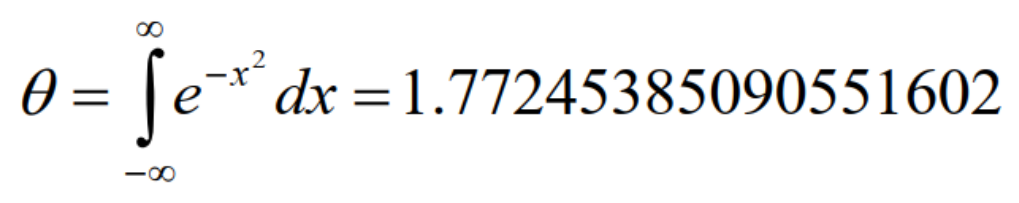

### Transforme la integral a una con límites de 0 a 1, muestre su procedimiento
Para poder hacer la transformación, se debe utilizar el cambio de variable siguiente:

$ x = \tan(\frac{\pi}{2} t) $ donde $t \in [0,1] $.

Esto nos permite transformar los límites de integración de $ x \in (-\infty, \infty) $ a $ t \in [0,1] $.

El diferencial se calcula de la siguiente manera:

$ dx = \frac{\pi}{2} \sec^2(\frac{\pi}{2}t) \, dt $

Por lo tanto, la integral se convierte en:

$ \theta = \int_{0}^{1} e^{-\tan^2(\frac{\pi}{2} t)} \cdot \frac{\pi}{2} \sec^2(\frac{\pi}{2} t) \, dt $.


### Aproxime la integral usando el método de Montecarlo, haciendo 100, 10,000 y 100,000 iteraciones.

In [42]:
import numpy as np
np.random.seed(1)

def f(t):
    return np.exp(-np.tan(np.pi*t/2)**2) * (np.pi/2) * (1/np.cos(np.pi*t/2))**2


def monte_carlo_integration(n):
    t = np.random.uniform(0, 1, n)
    y = f(t)
    integral = np.mean(y)
    return 2 * integral

n_values = [100, 10000, 100000]

for n in n_values:
    approximation = monte_carlo_integration(n)
    print(f"Aproximación con {n} iteraciones: {approximation}")

real_value = np.sqrt(np.pi)
print(f"Valor real: {real_value}")

Aproximación con 100 iteraciones: 1.8026206157624733
Aproximación con 10000 iteraciones: 1.7768520359977946
Aproximación con 100000 iteraciones: 1.7718047405859376
Valor real: 1.7724538509055159


# Parte 3

## Task 01

C:\Users\caste\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


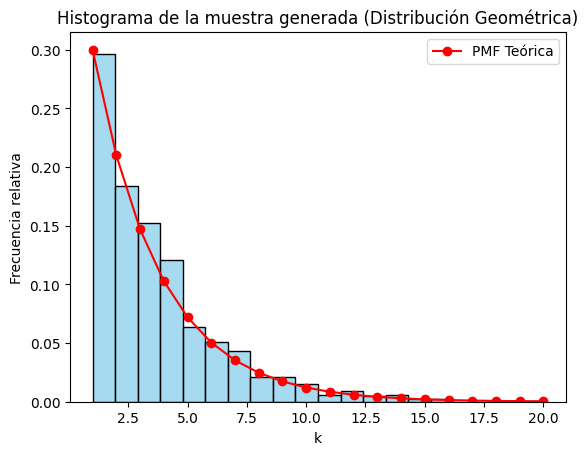

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


p = 0.3


sample_size = 1000


uniform_samples = np.random.uniform(0, 1, sample_size)


geom_samples = np.ceil(np.log(1 - uniform_samples) / np.log(1 - p)).astype(int)


sns.histplot(geom_samples, kde=False, color='skyblue', stat='probability', bins=max(geom_samples) - min(geom_samples) + 1)
plt.title('Histograma de la muestra generada (Distribución Geométrica)')
plt.xlabel('k')
plt.ylabel('Frecuencia relativa')


k_values = np.arange(1, max(geom_samples) + 1)
pmf_theoretical = (1 - p) ** (k_values - 1) * p

plt.plot(k_values, pmf_theoretical, 'r', marker='o', label='PMF Teórica')
plt.legend()
plt.show()
